# Tarea 3 propagación de laséres por el método ABCD#
## Carlos Iván Vázquz Hernández ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

El método de matrices ABCD nos permite describir la propagación de un haz de luz en un medio físico como lo podría ser una lente o un medio libre.
Definiendo a $q$ como:
\begin{equation}
    \frac{1}{q(z)}=\frac{1}{R(z)}-i\frac{\lambda}{\omega(z)^2\pi}
\end{equation}
Entonces
Y definiendo la matriz de un componente óptico como
\begin{equation}
    M=\begin{pmatrix}
    A & B\\
    C & D
    \end{pmatrix}
\end{equation}
tenemos que
\begin{equation}
 q_2(z)=\frac{Aq_1(z)+B}{Cq_1(z)+D}
\end{equation}

Con las ecuaciones de la cintura y el radio como:
\begin{align}
    \omega(z)^2&=\omega_0^2\left(1+\left(\frac{z}{z_R}\right)^2\right)\\
    R(z)&=z\left(1+\left(\frac{z_R}{z}\right)^2\right)
\end{align}
Donde $z_R$ es el rango de rayleigh definido como $z_R=\frac{\pi\omega_0^2}{\lambda}$

Definimos a la matriz de traslación de una distancia d como:
\begin{equation}
 M_T=\begin{pmatrix}
 1 & d\\
 0 & 1
 \end{pmatrix}
\end{equation}
La matriz de una lente delgada
\begin{equation}
    M_L=\begin{pmatrix}
    1 & 0\\
    -\frac{1}{f} & 1\\
    \end{pmatrix}
\end{equation}

# Propagación libre
En la propagación libre vamos a usar de manera recursiva la matriz de traslación con desplazamientos infinitesimales partiendo de la cintura del haz con $\omega_0=1mm$ hasta una distancia de un metro

In [2]:
w0=0.001
l = 532e-9
zr= np.pi*w0**2/l
d = 1
n=50
delta_z = d/n

### definimos las funciones de radio y cintura obtenidas del método analítico
def cintura(z):
    w = w0*np.sqrt(1+(z/zr)**2)
    return w
def radio(z):
    r = z*(1+(zr/z)**2)
    return r
### definimos el primer q1 usando numeros complejos con cmath.

q1=zr*1j

In [3]:
### HACEMOS LAS DOS LISTAS DE CINTURA Y RADIO DE CURVATURA DONDE GUARDAREMOS LOS VALORES
### OBTENIDOS CON LAS ITERACIONES
rad_n=[]
cint_n=[]
# HACEMOS LAS ITERACIONES CON UN CICLO FOR
for i in range(n):
    # le sumamos la distancia
    q2 = q1+delta_z
    # obtenemos los valores de curvatura y cintura
    q=1/q2
    r=1/q.real
    w=np.sqrt(-l/(q.imag*np.pi))
    # los agregamos a las listas
    rad_n.append(r)
    cint_n.append(w)
    # reasignamos el mismo valor
    q1=q2

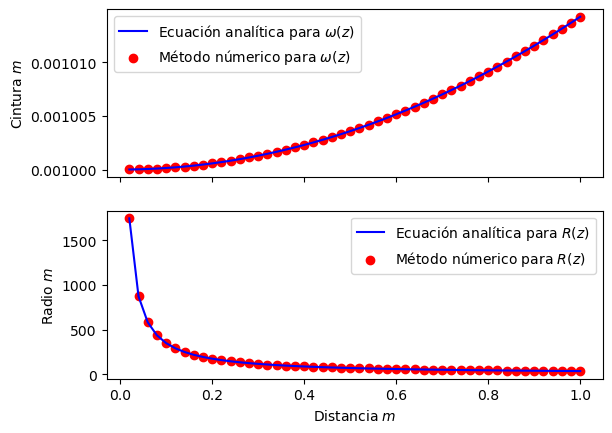

In [4]:
fig,(ax1,ax2)=plt.subplots(2,sharex=True)

ax1.plot(np.linspace(delta_z,1,n),cintura(np.linspace(delta_z,1,n)),color="blue",
         label="Ecuación analítica para $\omega(z)$")
ax1.scatter(np.linspace(delta_z,1,n),cint_n,marker="o",color="red",
            label="Método númerico para $\omega(z)$")
ax1.legend(loc="upper left")
ax1.set_ylabel("Cintura $m$")

ax2.plot(np.linspace(delta_z,1,n),radio(np.linspace(delta_z,1,n)),color="blue",
         label="Ecuación analítica para $R(z)$")
ax2.scatter(np.linspace(delta_z,1,n),rad_n,marker="o",color="red",
            label="Método númerico para $R(z)$")
ax2.legend(loc="upper right")
ax2.set_ylabel("Radio $m$")
ax2.set_xlabel("Distancia $m$")

plt.show()

# Propagación a través de un elemento óptico.
Vamos a empezar con una cintura inicial de $\omega_0=1mm$ propagandose distancias de $L_1=L_2=f=0.5m$

In [5]:
w02=0.001
l2 = 532e-9
zr2= np.pi*w02**2/l2
d2 = 1
n2=100
f=0.5
delta_z2 = d2/n2

In [6]:
q0=zr2*1j
rad2_n=[]
cint2_n=[]
for i in range(1,n2+1):
    if i < n2/2:
        # le sumamos la distancia
        qp = q0+delta_z2
        # obtenemos los valores de curvatura y cintura
        qpp=1/qp
        r2=1/qpp.real
        w2=np.sqrt(-l2/(qpp.imag*np.pi))
        # los agregamos a las listas
        rad2_n.append(r2)
        cint2_n.append(w2)
        # reasignamos el mismo valor
        q0=qp
    if i == n2/2:
        # le sumamos la distancia
        qp = q0/((-q0/f)+1)
        # obtenemos los valores de curvatura y cintura
        qpp=1/qp
        r2=1/qpp.real
        w2=np.sqrt(-l2/(qpp.imag*np.pi))
        # los agregamos a las listas
        rad2_n.append(r2)
        cint2_n.append(w2)
        # reasignamos el mismo valor
        q0=qp
    if i > n2/2:
        # le sumamos la distancia
        qp = q0+delta_z2
        # obtenemos los valores de curvatura y cintura
        qpp=1/qp
        r2=1/qpp.real
        w2=np.sqrt(-l2/(qpp.imag*np.pi))
        # los agregamos a las listas
        rad2_n.append(r2)
        cint2_n.append(w2)
        # reasignamos el mismo valor
        q0=qp

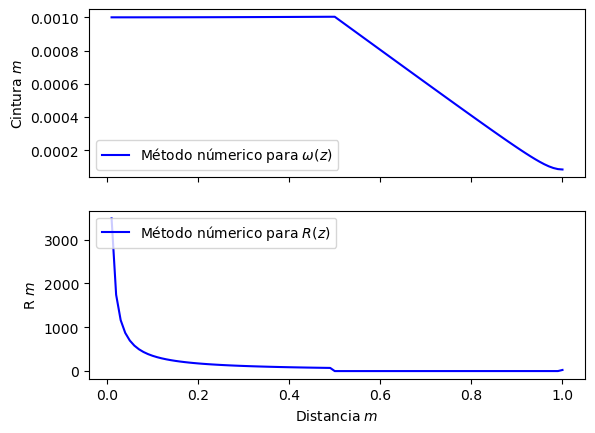

In [7]:
fig,(a1,a2)=plt.subplots(2,sharex=True)

a1.plot(np.linspace(delta_z2,1,n2),cint2_n,color="blue",
            label="Método númerico para $\omega(z)$")
a1.legend(loc="lower left")
a1.set_ylabel("Cintura $m$")


a2.plot(np.linspace(delta_z2,1,n2),rad2_n,color="blue",
            label="Método númerico para $R(z)$")
a2.legend(loc="upper left")
a2.set_ylabel("R $m$")
a2.set_xlabel("Distancia $m$")
plt.show()